# Explore endangered languages from UNESCO Atlas of the World's Languages in Danger

### Input

Endangered languages

- https://www.kaggle.com/the-guardian/extinct-languages/version/1 (updated in 2016)
- original data: http://www.unesco.org/languages-atlas/index.php?hl=en&page=atlasmap (published in 2010)

Countries of the world

- https://www.ethnologue.com/sites/default/files/CountryCodes.tab


### Output - TBD
- `endangered_languages_europe.csv`

## Imports

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Load data

In [2]:
df = pd.read_csv("../../data/endangerment/extinct_languages.csv")
print(df.shape)
print(df.dtypes)
df.head()

(2722, 15)
ID                               int64
Name in English                 object
Name in French                  object
Name in Spanish                 object
Countries                       object
Country codes alpha 3           object
ISO639-3 codes                  object
Degree of endangerment          object
Alternate names                 object
Name in the language            object
Number of speakers             float64
Sources                         object
Latitude                       float64
Longitude                      float64
Description of the location     object
dtype: object


,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,1022,South Italian,italien du sud,napolitano-calabrés,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,1023,Sicilian,sicilien,siciliano,Italy,ITA,scn,Vulnerable,NaN,NaN,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,383,Low Saxon,bas-saxon,bajo sajón,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",Neddersassisch,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th..."
3,335,Belarusian,biélorusse,bielorruso,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,NaN,NaN,4000000.0,Hienadź Cychun: Weißrussisch. — Lexikon der Sp...,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...
4,382,Lombard,lombard,lombardo,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,NaN,NaN,3500000.0,NaN,45.7215,9.3273,the region of Lombardy (except the southernmos...


In [3]:
df.columns

Index(['ID', 'Name in English', 'Name in French', 'Name in Spanish',
       'Countries', 'Country codes alpha 3', 'ISO639-3 codes',
       'Degree of endangerment', 'Alternate names', 'Name in the language',
       'Number of speakers', 'Sources', 'Latitude', 'Longitude',
       'Description of the location'],
      dtype='object')

In [4]:
ENDANGERMENT_MAP = {
    "Vulnerable": 1,
    "Definitely endangered": 2,
    "Severely endangered": 3,
    "Critically endangered": 4,
    "Extinct": 5,
}

In [5]:
df["Endangerment code"] = df["Degree of endangerment"].apply(lambda x: ENDANGERMENT_MAP[x])
df[["Degree of endangerment", "Endangerment code"]]

,Degree of endangerment,Endangerment code
0,Vulnerable,1
1,Vulnerable,1
2,Vulnerable,1
3,Vulnerable,1
4,Definitely endangered,2
...,...,...
2717,Severely endangered,3
2718,Definitely endangered,2
2719,Definitely endangered,2
2720,Definitely endangered,2


## Distribution of the degree of endangerment

<AxesSubplot:>

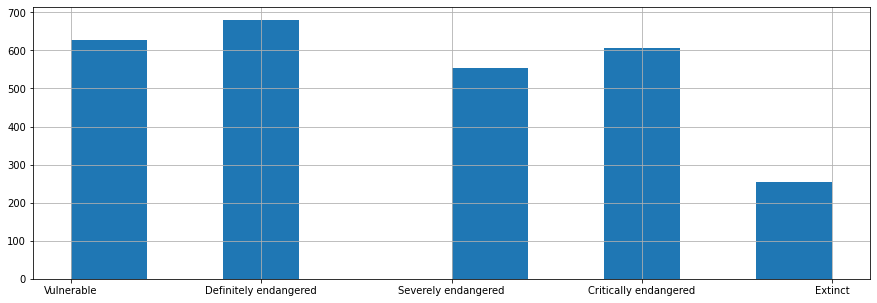

In [6]:
df["Degree of endangerment"].hist(figsize=(15,5))

## Show distribution on map

In [7]:
countries_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


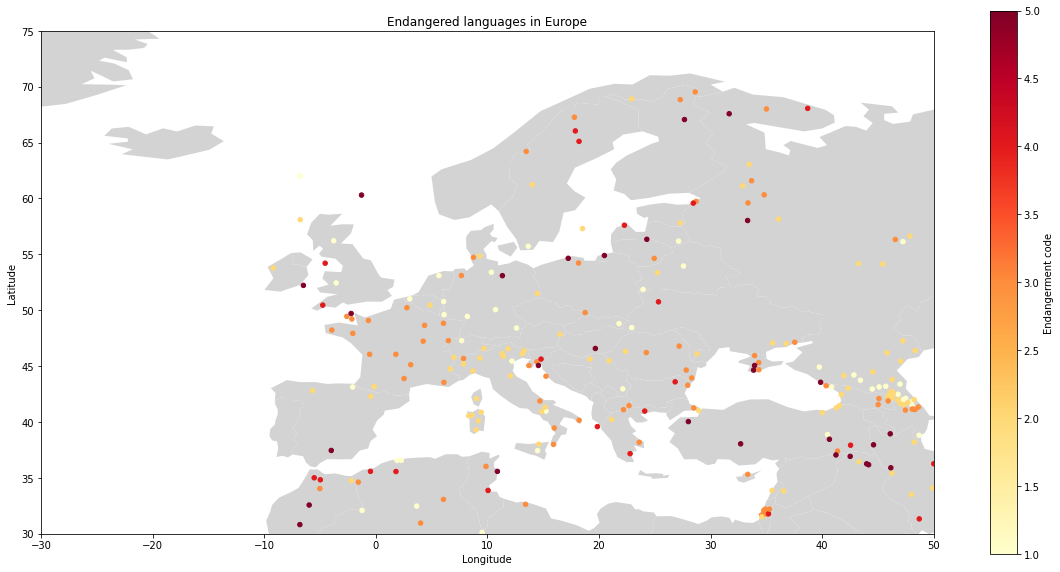

In [8]:
# Plot Europe
fig, ax = plt.subplots(figsize=(20, 10))

countries_map.plot(color='lightgrey', ax=ax)
plt.xlim([-30, 50])
plt.ylim([30, 75])

df.plot(
    x="Longitude", 
    y="Latitude", 
    kind="scatter", 
    title="Endangered languages in Europe", 
    c="Endangerment code", 
    colormap="YlOrRd",
    ax=ax,
)

plt.show()

## Get endangered languages only for Europe

In [9]:
countries = pd.read_csv("../../data/general/country_codes.tsv", sep="\t")
europe = countries[countries["Area"] == "Europe"]
europe

,CountryID,Name,Area
0,AD,Andorra,Europe
5,AL,Albania,Europe
10,AT,Austria,Europe
13,AX,Aland Islands,Europe
15,BA,Bosnia and Herzegovina,Europe
18,BE,Belgium,Europe
20,BG,Bulgaria,Europe
33,BY,Belarus,Europe
40,CH,Switzerland,Europe
53,CZ,Czechia,Europe


In [10]:
europe_countries = set(europe["Name"].to_list())
europe_countries

{'Aland Islands',
 'Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Czechia',
 'Denmark',
 'Estonia',
 'Faroe Islands',
 'Finland',
 'France',
 'Germany',
 'Gibraltar',
 'Greece',
 'Guernsey',
 'Hungary',
 'Iceland',
 'Ireland',
 'Isle of Man',
 'Italy',
 'Jersey',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom',
 'Vatican State'}

In [11]:
df[df["Countries"].isna()]

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location,Endangerment code
405,1680,Boro,boro,boro,NaN,NaN,bwo,Definitely endangered,Shinasha,NaN,19878.0,"Census, Zelealem Leyew",10.3581,35.0024,NaN,2


In [12]:
df = df[df["Countries"].notna()]
df[df["Countries"].isna()]

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location,Endangerment code


In [13]:
df["In Europe"] = df["Countries"].apply(lambda x: len(europe_countries.intersection(set(x.split(",")))) > 0)
df_europe = df.loc[df["In Europe"] == True]

print(df_europe.shape)
df_europe.head(20)

(247, 17)


/tmp/ipykernel_202464/3780059199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["In Europe"] = df["Countries"].apply(lambda x: len(europe_countries.intersection(set(x.split(",")))) > 0)


,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location,Endangerment code,In Europe
0,1022,South Italian,italien du sud,napolitano-calabrés,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz...",1,True
1,1023,Sicilian,sicilien,siciliano,Italy,ITA,scn,Vulnerable,NaN,NaN,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri...",1,True
2,383,Low Saxon,bas-saxon,bajo sajón,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",Neddersassisch,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th...",1,True
3,335,Belarusian,biélorusse,bielorruso,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,NaN,NaN,4000000.0,Hienadź Cychun: Weißrussisch. — Lexikon der Sp...,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...,1,True
4,382,Lombard,lombard,lombardo,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,NaN,NaN,3500000.0,NaN,45.7215,9.3273,the region of Lombardy (except the southernmos...,2,True
5,405,Romani,romani,romaní,"Albania, Germany, Austria, Belarus, Bosnia and...","ALB, DEU, AUT, BRB, BIH, BGR, HRV, EST, FIN, F...","rmc, rmf, rml, rmn, rmo, rmw, rmy",Definitely endangered,"sinti, vlax, calò",NaN,3500000.0,Yaron Matras: Romani: a linguistic introductio...,46.3165,22.3681,"many European countries, most densely in East-...",2,True
8,1020,Limburgian-Ripuarian,francique ripuaire -limbourgeois,limburgués-ripuarino,"Germany, Belgium, Netherlands","DEU, BEL, NLD","ksh, lim",Vulnerable,Colognian (dialect; in German: Kölsch),NaN,2600000.0,NaN,50.7781,6.0864,Limburg provinces in Belgium and the Netherlan...,1,True
12,349,Emilian-Romagnol,émilien-romagnol,emiliano,"Italy, San Marino","ITA, SMR",eml,Definitely endangered,NaN,NaN,2000000.0,NaN,44.1270,12.0739,"the region of Emilia-Romagna, parts of the pro...",2,True
13,399,Piedmontese,piémontais,piamontés,Italy,ITA,pms,Definitely endangered,NaN,NaN,2000000.0,NaN,45.2013,7.8662,"Piedmont Region except the Novara Province, th...",2,True
14,1021,Venetan,vénitien,veneciano,"Croatia, Italy, Slovenia","HRV, ITA, SVN",vec,Vulnerable,NaN,NaN,2000000.0,http://www.elgalepin.com/,45.4601,12.1948,"Veneto region, parts of Friuli-Venezia Giulia,...",1,True


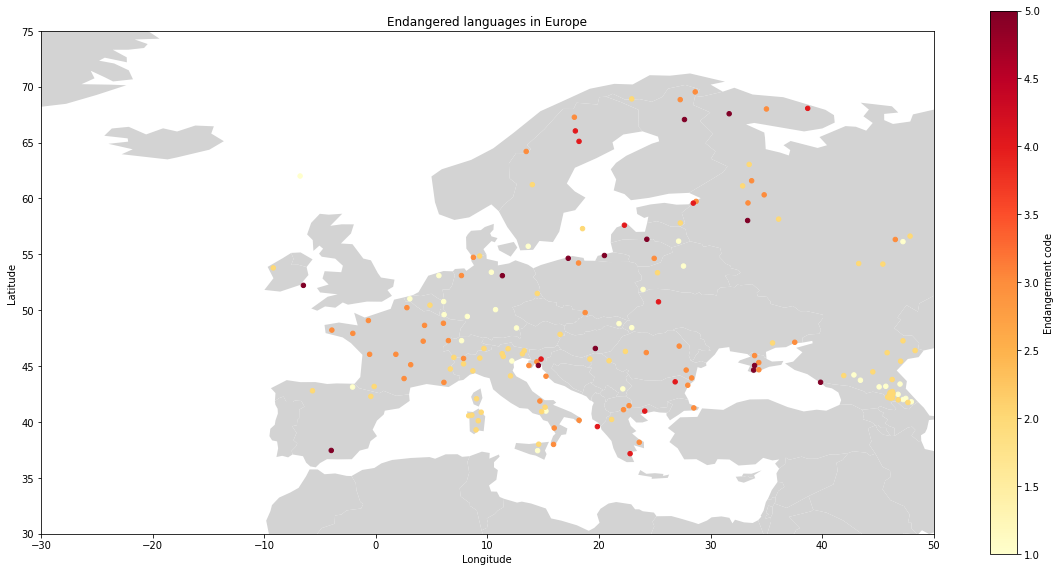

In [14]:
# Plot only European endangered languages
fig, ax = plt.subplots(figsize=(20, 10))

countries_map.plot(color='lightgrey', ax=ax)
plt.xlim([-30, 50])
plt.ylim([30, 75])

df_europe.plot(
    x="Longitude", 
    y="Latitude", 
    kind="scatter", 
    title="Endangered languages in Europe", 
    c="Endangerment code", 
    colormap="YlOrRd",
    ax=ax,
)

plt.show()

## Save output

In [15]:
df_europe.to_csv("../../data/endangerment/endangered_languages_europe.csv", index=False)